In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data=pd.read_csv('Churn_Modelling.csv',usecols=['CreditScore','Geography',
       'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
       'IsActiveMember','EstimatedSalary','Exited'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

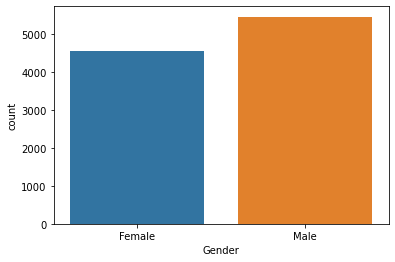

In [8]:
import seaborn as sns

sns.countplot(x='Gender',data=data)

<AxesSubplot:xlabel='Geography', ylabel='count'>

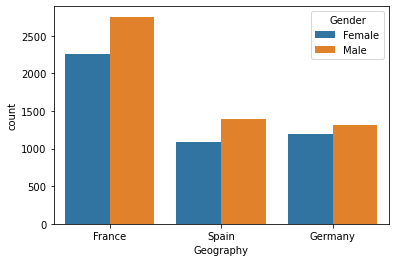

In [9]:
sns.countplot(hue='Gender',x='Geography',data=data)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

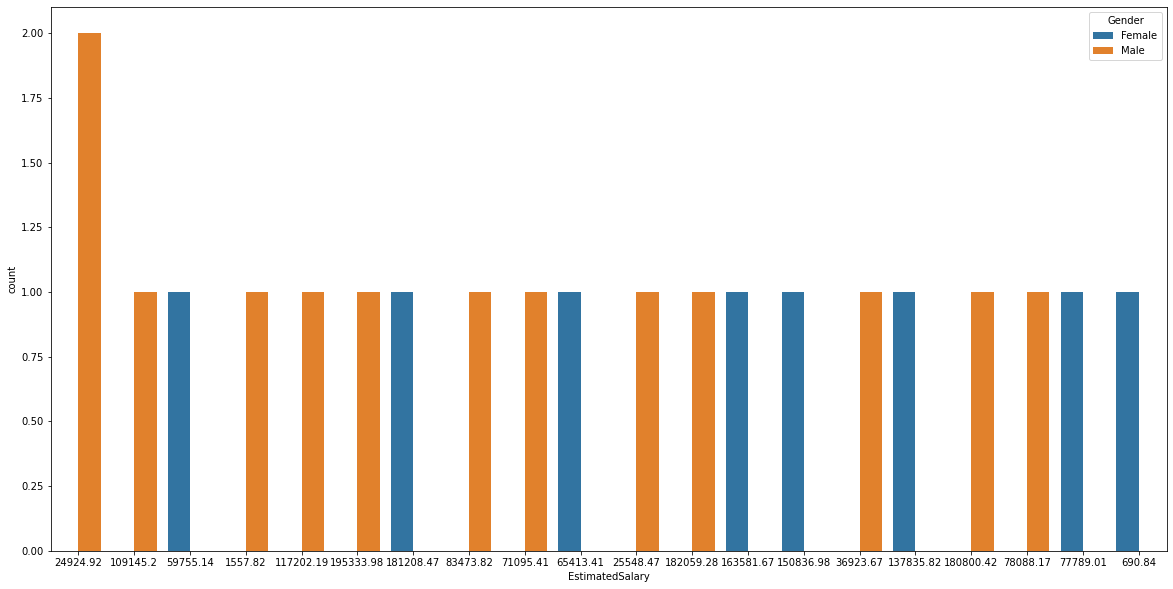

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(hue='Gender',x='EstimatedSalary',data=data,order=data['EstimatedSalary'].value_counts().index[0:20])


In [11]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']

x.head()
# x.shape,y.shape

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
geography=pd.get_dummies(x['Geography'],drop_first=True)


geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [13]:
gender=pd.get_dummies(x['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [14]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
x=pd.concat([x,geography,gender],axis=1)
x=x.drop(['Geography','Gender'],axis=1)
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

xtest.shape,ytest.shape

((2000, 11), (2000,))

In [17]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(xtrain)
x_test=st.fit_transform(xtest)

In [18]:
# pip install keras

In [19]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [20]:
xtrain.shape,ytrain.shape

((8000, 11), (8000,))

In [21]:
classifier=Sequential()

classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))  #inp_dim is col size
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


                   
model_history=classifier.fit(x_train,ytrain,validation_split=0.33,batch_size=10,epochs=100)     



Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5116 - accuracy: 0.7848 - val_loss: 0.4724 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.8044 - val_loss: 0.4438 - val_accuracy: 0.8069
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4307 - accuracy: 0.8130 - val_loss: 0.4284 - val_accuracy: 0.8129
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4159 - accuracy: 0.8166 - val_loss: 0.4194 - val_accuracy: 0.8164
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8235 - val_loss: 0.4113 - val_accuracy: 0.8220
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3948 - accuracy: 0.8296 - val_loss: 0.4043 - val_accuracy: 0.8251
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3850 - accuracy: 0.8384 - val_loss: 0.3966 - val_accuracy: 0.8338

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3305 - accuracy: 0.8623 - val_loss: 0.3601 - val_accuracy: 0.8535
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8636 - val_loss: 0.3605 - val_accuracy: 0.8538
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8623 - val_loss: 0.3600 - val_accuracy: 0.8527
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8614 - val_loss: 0.3596 - val_accuracy: 0.8516
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8623 - val_loss: 0.3598 - val_accuracy: 0.8561
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3291 - accuracy: 0.8623 - val_loss: 0.3591 - val_accuracy: 0.8531
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3291 - accuracy: 0.8640 - val_loss: 0.3601 - val_accuracy:

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(ytest,y_pred)
cls=classification_report(ytest,y_pred)
print(cm)
print(cls)

[[1539   56]
 [ 212  193]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.78      0.48      0.59       405

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,ytest)
print(score)

0.866


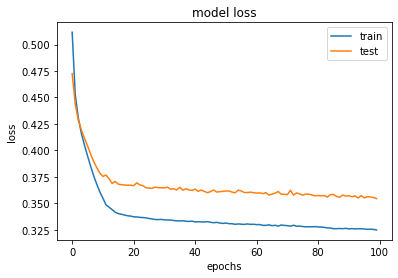

In [25]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()